# A ReDI School of Digital Integration Berlin Project
## By a team of ReDI school students, alumni, and teachers.
### This project consists of 3 main groups:
### 1-The database group is responsible for designing a database and read data from a google sheet and run it on a server.
### 2-The data team is responsible to read data from the database and clean it, analyze it and visualize it on the data studio dashboard.
### 2-Front-end team is responsible to design a website for this reason and read data from the final database

### Import libraries and Functions

In [1]:
import pandas as pd
from ipywidgets import interact
import re
import numpy as np
import seaborn as sns
import psycopg2 as pg2
import gspread
import json
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g
import matplotlib.pyplot as plt
from frequency_city import freq_function
from language import english, german, lang_detector, job_language
from city_finder import location_finder
from experience_counter import experience
from exp_level import exp_level_practicant, exp_level_entry, exp_level_junior, exp_level_senior, exp_level_internship, exp_level_praktikum
from find_software_skills import all_skills,find_sql, find_python, find_java, find_javascript, find_sas, find_scala, find_r, find_julia, find_octave, find_matlab, find_swift, visualization_softwares
sns.set(style="dark", palette="pastel", color_codes=True) 
sns.mpl.rc("figure", figsize=(10,6))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mohsen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mohsen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Mohsen\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Mohsen\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


## Reading data online from the data base

In [2]:
secret= '7D89x8zo'
conn = pg2.connect(database='postgres', user = 'postgres', password=secret, host="test-db.cvvgqompnycg.eu-central-1.rds.amazonaws.com",)
print("Database opened successfully")

Database opened successfully


In [3]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM jobs')
data = cursor.fetchall()
headers = [i[0] for i in cursor.description]
cursor.close()
conn.close()

In [7]:
df =pd.DataFrame(data,columns = headers)
#df = pd.read_csv("dataset.csv")

In [8]:
df = df.copy()

In [9]:
df.head()

,zeitstempel,source,header,content,language,employment_type,poster,experience_level,link,company,location,deadline,redi_community_only,contact_person,id,summary
0,https://www.linkedin.com/jobs/view/2383140949/...,https://www.linkedin.com/jobs/view/2383140949/...,Data Analyst - Data enablement (Zalando Offprice),\nAbout the job\nAs Data Analyst - Data enable...,English,Full-Time,Julian,Entry-level,https://jobs.zalando.com/en/jobs/2565512?gh_sr...,Zalando,Berlin,None,FALSE,Sebastian Shelton,66,Data Analyst - Data enablement (Zalando Offprice)
1,https://project-a.join.com/jobs/2215466-junior...,https://project-a.join.com/jobs/2215466-junior...,(Junior) Data Analyst (m/f/d),We are looking for:\n\nA new member for our Da...,English,Full-Time,Julian,Entry-level,https://project-a.join.com/jobs/2215466-junior...,Project A,Berlin,None,FALSE,Recruiting Team,67,(Junior) Data Analyst (m/f/d)
2,https://moyyn.com/job/moyyn-berlin-germany-stu...,https://moyyn.com/job/moyyn-berlin-germany-stu...,Student Data Analytics,Your mission\n\n \n\n*Understand business visi...,English,Student job,Julian,Entry-level,https://moyyn.com/job/moyyn-berlin-germany-stu...,Moyyn,Berlin,None,FALSE,None,68,Student Data Analytics
3,https://casparhealth.join.com/jobs/2200290-jun...,https://casparhealth.join.com/jobs/2200290-jun...,"Junior Data Analyst (all genders), full-time",Das erwartet Dich\n\nYou will work closely wit...,English,Full-Time,Julian,Entry-level,https://casparhealth.join.com/jobs/2200290-jun...,Caspar Health,Berlin,None,FALSE,Recruiting Team,69,"Junior Data Analyst (all genders), full-time"
4,https://jobs.cisco.com/jobs/ProjectDetail/Work...,https://jobs.cisco.com/jobs/ProjectDetail/Work...,Working Student - Data Analyst in Sales - (Bac...,\nStart Date: flexible\n\nInternship location:...,Deutsch,Student job,Julian,Mid-level,https://jobs.cisco.com/jobs/ProjectDetail/Work...,Cisco,Munich,None,FALSE,None,70,Working Student - Data Analyst in Sales - (Bac...


## Language Requirement
### Extracting language requirements from content of the job adds

In [10]:
# Find english / German language requrements through the content of job adds.
df['english'] = df['content'].apply(lambda x: english(x))
df['english'].replace({"englisch": "english"}, inplace=True)
df['german'] = df['content'].apply(lambda x: german(x))
df['german'].replace({"deutsch": "german"}, inplace=True)
df['english'].fillna("Not specified", inplace=True)
df['german'].fillna("Not specified", inplace=True)

In [11]:
#if it is not mentioned on the content system will decide the language according to content's language.
for item , counter in zip(df['english'] , range(len(df['english']))):
    if item =="Not specified":
        df["english"][counter] = lang_detector(df["content"][counter])
    else:
        pass

df['english'].replace({"en": "english"}, inplace=True)
df['english'].replace({"de": "german"}, inplace=True)

<ipython-input-11-d6489e95d2fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["english"][counter] = lang_detector(df["content"][counter])


In [12]:
for item , counter in zip(df['german'] , range(len(df['german']))):
    if item =="Not specified":
        df["german"][counter] = lang_detector(df["content"][counter])
    else:
        pass

df['german'].replace({"en": "english"}, inplace=True)
df['german'].replace({"de": "german"}, inplace=True)

<ipython-input-12-0ac55d0b3d80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["german"][counter] = lang_detector(df["content"][counter])


In [13]:
df['Language Requirement'] = df.apply(lambda x: job_language(x['english'], x['german']), axis=1)

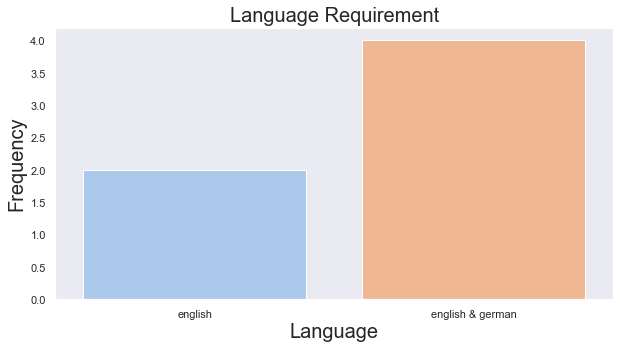

In [14]:
#Visualizin language requirements 
plt.figure(figsize=(10,5))
sns.countplot(x='Language Requirement', data=df)
plt.xlabel("Language", fontsize = 20)
plt.ylabel("Frequency", fontsize = 20)
plt.title('Language Requirement', fontsize = 20)
plt.show()

## Employment types
### find different types of employements that are posted and Visualizing them 

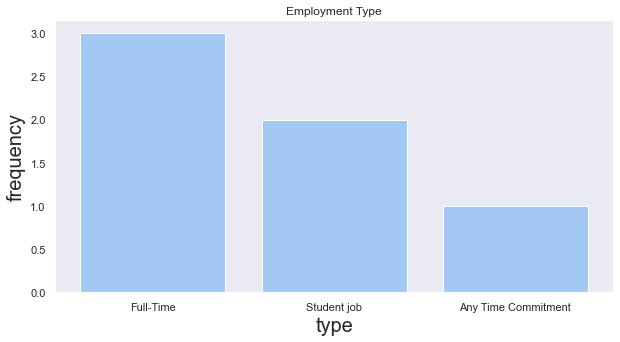

In [15]:
from frequency_dict import other_freq
employment = other_freq(df['employment_type'])
plt.figure(figsize=(10,5))
plt.bar(list(employment.keys()), list(employment.values()))
plt.xlabel("type", fontsize = 20)
plt.ylabel("frequency",fontsize = 20)
plt.title("Employment Type")
plt.show()

## Locations
### Jobs are from what cities?

In [16]:
# find the frequency of cities in df
df['Location'] = df.apply(lambda x: location_finder(x['content']), axis=1)
location =freq_function(df.Location)
df['Location'] = df['Location'].str.get(0)
df['Location'] =  df['Location'].replace('Manage','Berlin')

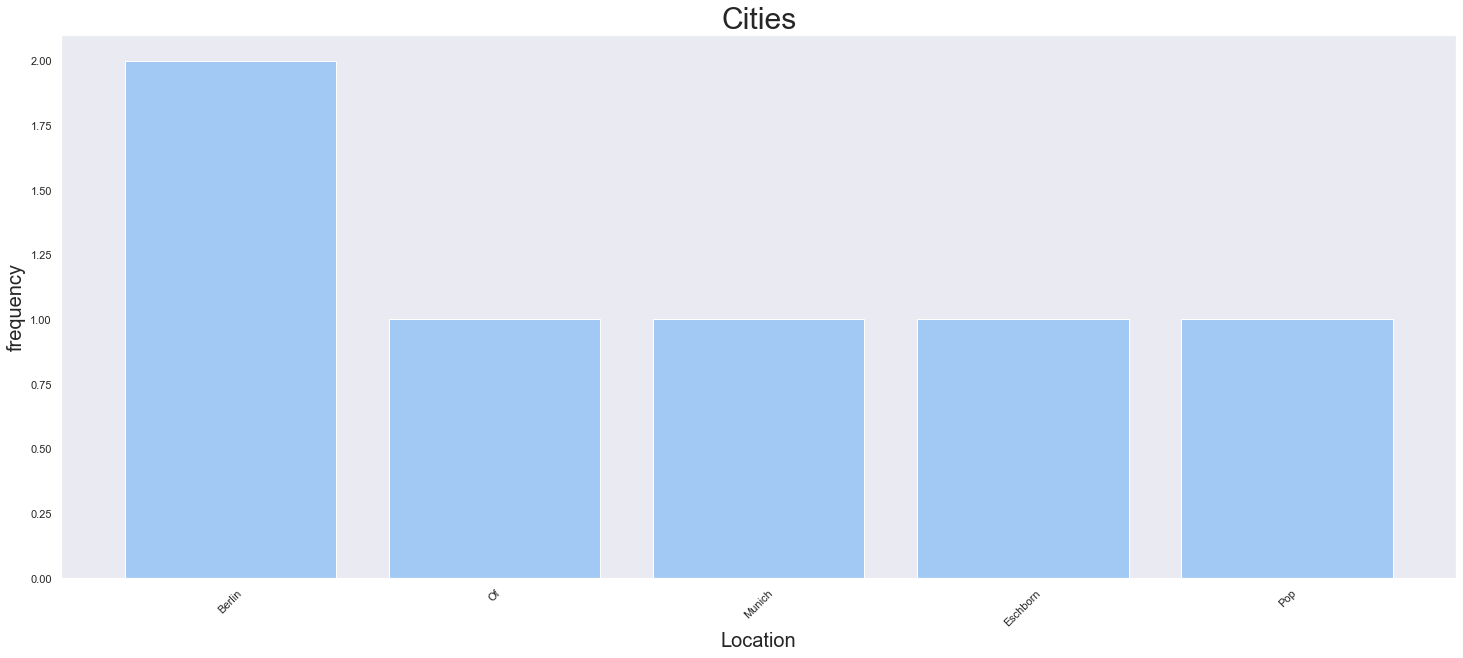

In [17]:
#Visualtizing most used locations
plt.figure(figsize=(25,10))
plt.bar(list(location.keys()), list(location.values()))
plt.xlabel("Location", fontsize = 20)
plt.ylabel("frequency",fontsize = 20)
plt.title("Cities", fontsize = 30)
plt.xticks(rotation = 45)
plt.show()

## Find software skill
### Each job requires some software skills, let's find them

In [18]:
df['Visualization'] = df['content'].apply(lambda x: visualization_softwares(x))
df['Python'] = df['content'].apply(lambda x: find_python(x))
df['SQL'] = df['content'].apply(lambda x: find_sql(x))
df['R'] = df['content'].apply(lambda x: find_r(x))
df['Matlab'] = df['content'].apply(lambda x: find_matlab(x))
df['Java'] = df['content'].apply(lambda x: find_java(x))
df['Javascript'] = df['content'].apply(lambda x: find_javascript(x))
df['Swift'] = df['content'].apply(lambda x: find_swift(x))
df['Julia'] = df['content'].apply(lambda x: find_julia(x))
df['Scala'] = df['content'].apply(lambda x: find_scala(x))
df['Octave'] = df['content'].apply(lambda x: find_octave(x))
df['SAS'] = df['content'].apply(lambda x: find_sas(x))

In [19]:
df["software skills"] = df['content'].apply(lambda x: all_skills(x))

In [20]:
visualizations = other_freq(df.Visualization)
python = other_freq(df.Python)
sql = other_freq(df.SQL)
R = other_freq(df.R)
matlab = other_freq(df.Matlab)
java = other_freq(df.Java)
javascript = other_freq(df.Javascript)
swift = other_freq(df.Swift)
julia = other_freq(df.Julia)
scala = other_freq(df.Scala)
octave = other_freq(df.Octave)
sas = other_freq(df.SAS)

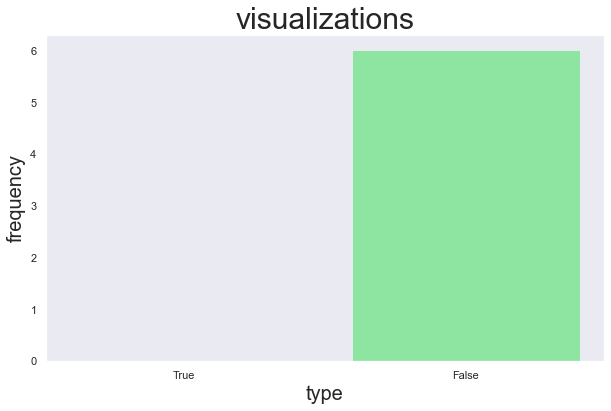

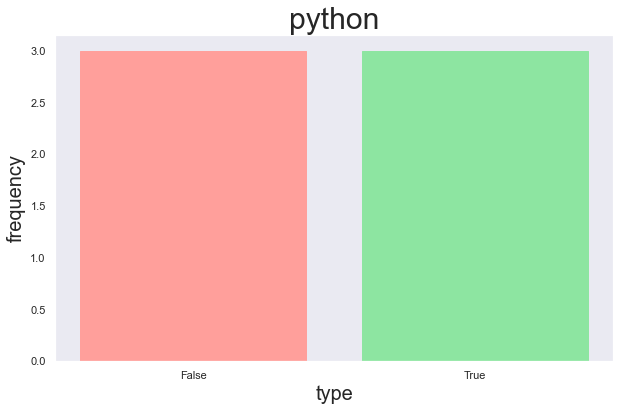

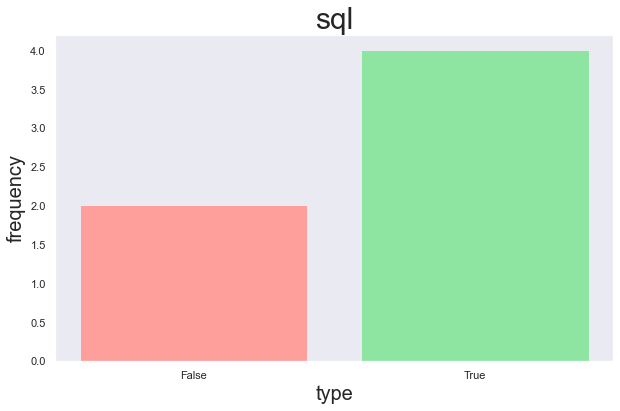

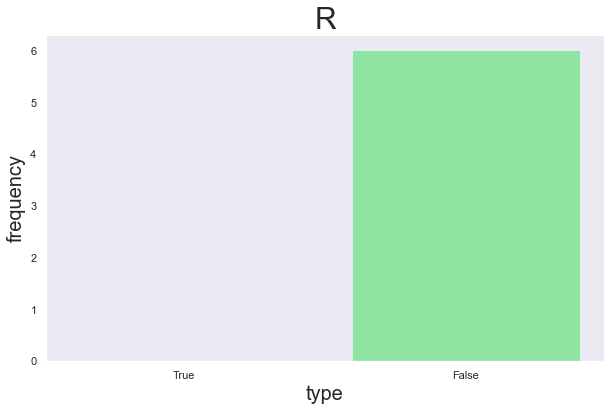

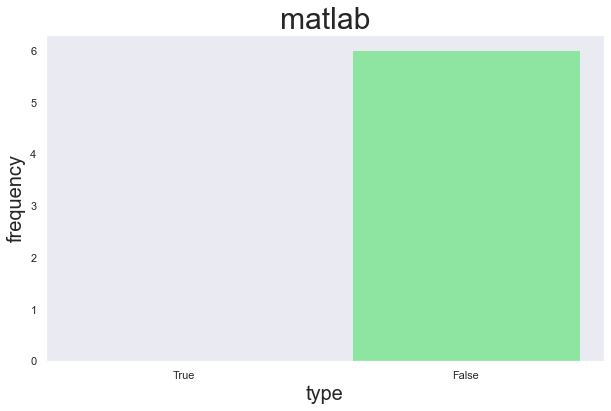

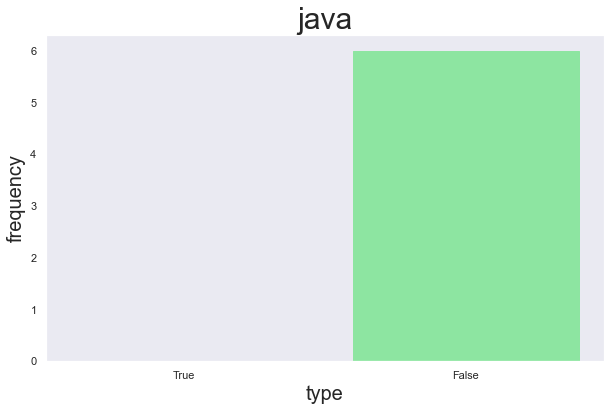

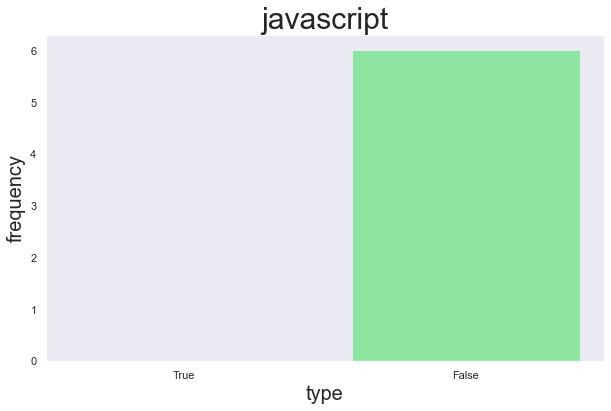

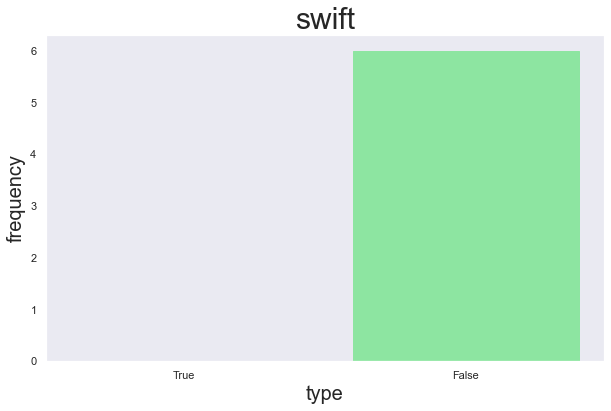

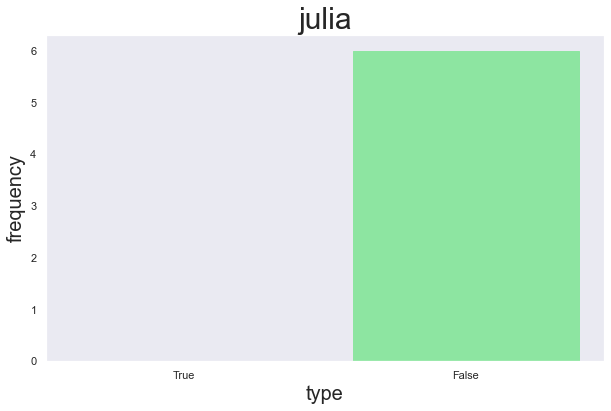

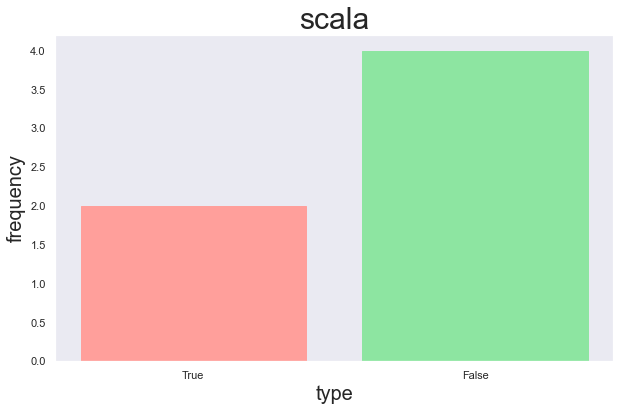

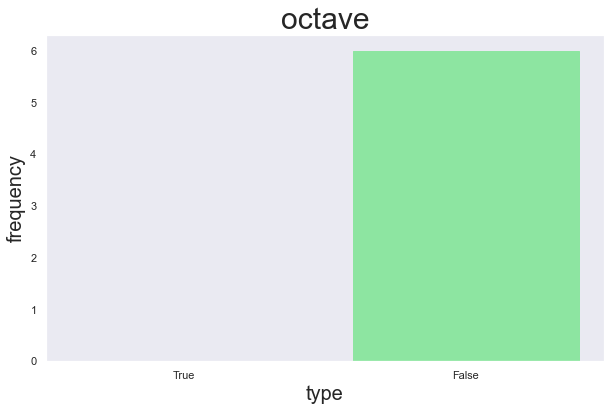

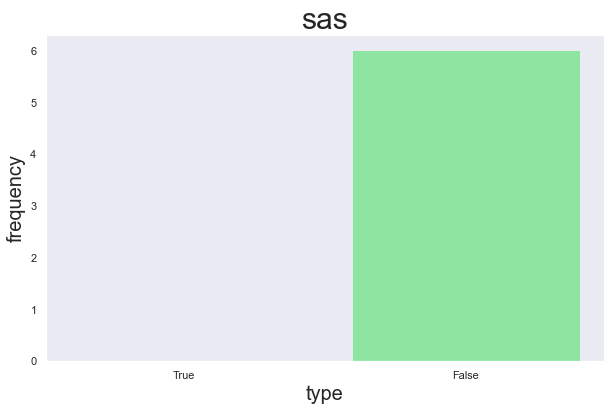

In [21]:
# Visualization software skills

skills = ['visualizations', 'python','sql','R','matlab','java', 'javascript','swift','julia','scala','octave','sas']
val = [visualizations, python , sql, R, matlab, java, javascript, swift, julia, scala, octave, sas]

for skill , name in zip(val, skills):
    base = {False : 0 , True : 0}
    all(map( base.pop, skill))
    z = {**base, **skill}
    keys = list(z.keys())
    keyss = []
    for t in keys:
        if t == False:
            keyss.append('False')
        elif t == True:
            keyss.append('True')
    values = z.values()
    barlist = plt. bar(keyss, values)
    barlist[0].set_color('r')
    barlist[1].set_color('g')
    plt.xlabel("type", fontsize = 20)
    plt.ylabel("frequency",fontsize = 20)
    plt.title(name, fontsize = 30)
    #plt.rcParams["figure.figsize"] = (5,5)
    plt.show()

## Employment level
### Some companies are hiring senior people but some are looking for a junior level or maybe practicing
### using this part we can find them.

In [25]:
df['internship'] = df['content'].apply(lambda x: exp_level_internship(x))
df['praktikum'] = df['content'].apply(lambda x: exp_level_praktikum(x))
df['practicant'] = df['content'].apply(lambda x: exp_level_practicant(x))
df['entry'] = df['content'].apply(lambda x: exp_level_entry(x))
df['junior'] = df['content'].apply(lambda x: exp_level_junior(x))
df['senior'] = df['content'].apply(lambda x: exp_level_senior(x))

In [26]:
internship = other_freq(df.internship)
praktikum = other_freq(df.praktikum)
practicant = other_freq(df.practicant)
entry = other_freq(df.entry)
junior = other_freq(df.junior)
senior = other_freq(df.senior)

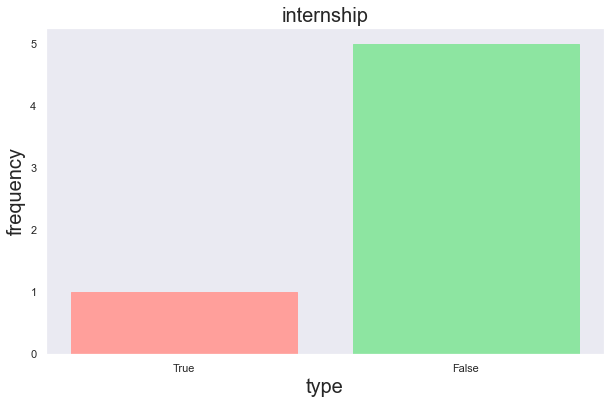

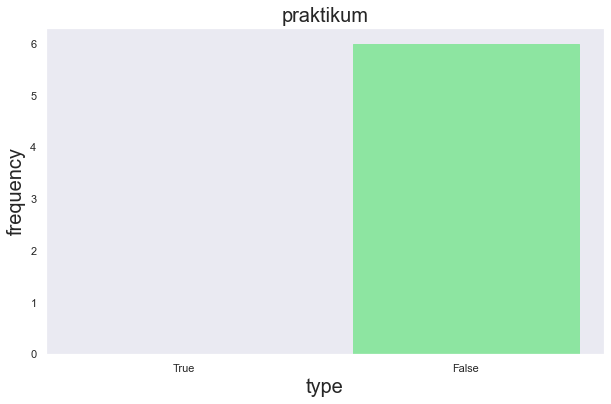

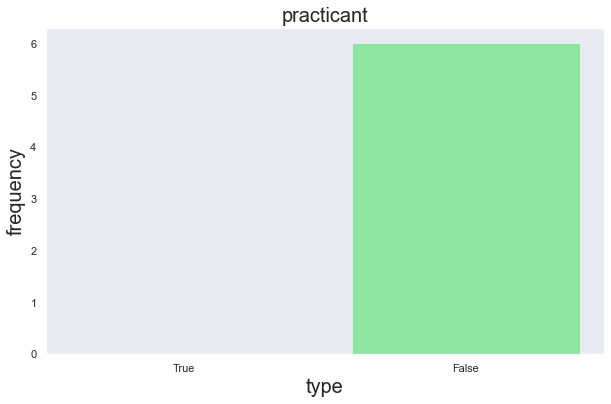

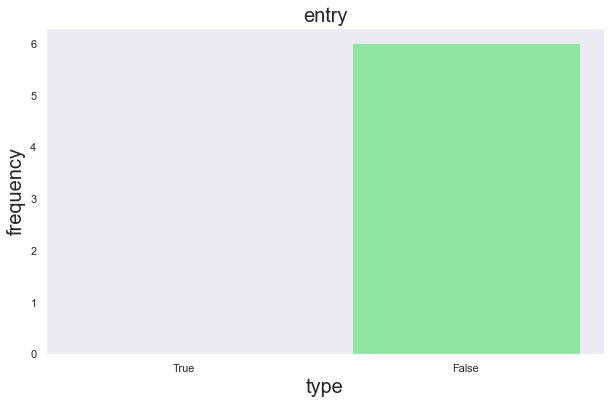

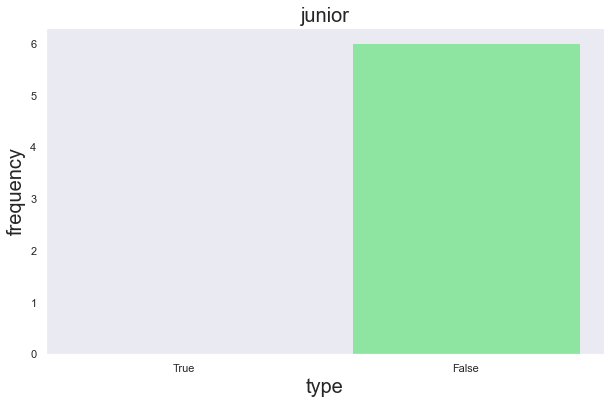

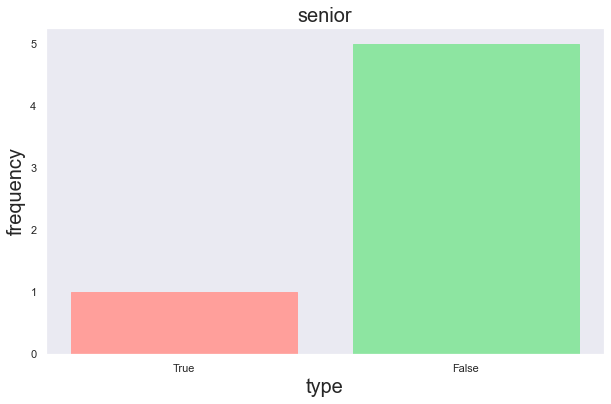

In [27]:
# Visualizing emplyement levels
exp = [internship, praktikum, practicant, entry, junior, senior]
exp_name = ['internship', 'praktikum', 'practicant', 'entry', 'junior', 'senior']
for ex , name in zip(exp, exp_name):
    temp = {False : 0 , True : 0}
    all(map( temp.pop, ex))
    z_ = {**temp, **ex}
    keys_ = list(z_.keys())
    keyss_ = []
    for t in keys_:
        if t == False:
            keyss_.append('False')
        elif t == True:
            keyss_.append('True')
    values_ = z_.values()
    pl = plt. bar(keyss_, values_)
    pl[0].set_color('r')
    pl[1].set_color('g')
    plt.xlabel("type", fontsize = 20)
    plt.ylabel("frequency",fontsize = 20)
    plt.title(name, fontsize = 20)
    plt.show()

## Experience Level

In [28]:
df['Experience'] = df['content'].apply(lambda x: experience(x))
df['Experience'].replace({' (2 years': "1-3 years",'2 years' : '1-3 years' ,'two years': "1-3 years", '2-3 years':  "1-3 years", "1-3 years" :  "1-3 years", '3 years':'1-3 years'\
                         ,' 3+ years': '3+ to 5 years', '1-4 years': '3+ to 5 years', '5 years':'3+ to 5 years', 'ten years':'5+ years', ' 10 years': '5+ years', 'new years': 'not specified'}, inplace=True)
df['Experience'].fillna('not specified',inplace=True )

In [29]:
df['Experience'].value_counts()

not specified    4
3+ to 5 years    1
 >3 years        1
Name: Experience, dtype: int64

<AxesSubplot:xlabel='Experience', ylabel='count'>

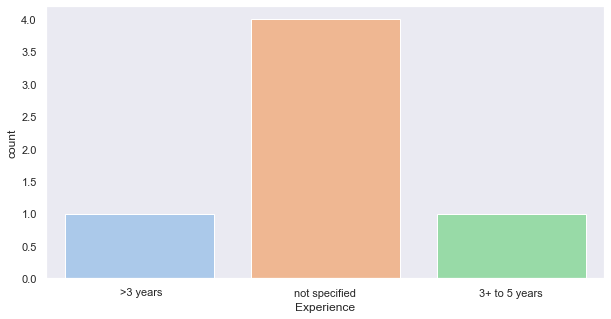

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Experience', data=df)

## Relationship
### There could be relations between employement types and maybe software skills

<AxesSubplot:xlabel='employment_type', ylabel='count'>

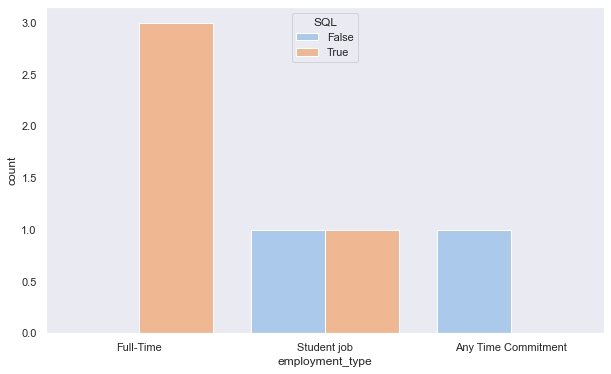

In [31]:
#Employment vs SQL
sns.countplot(x="employment_type", hue='SQL', data=df)

<AxesSubplot:xlabel='employment_type', ylabel='count'>

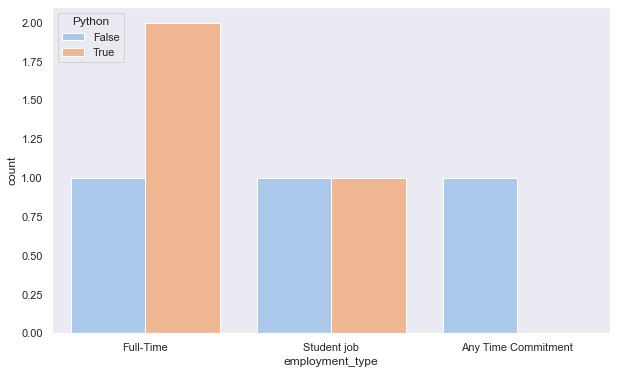

In [32]:
#Employment vs Python
sns.countplot(x="employment_type", hue="Python", data=df)

<AxesSubplot:xlabel='junior', ylabel='count'>

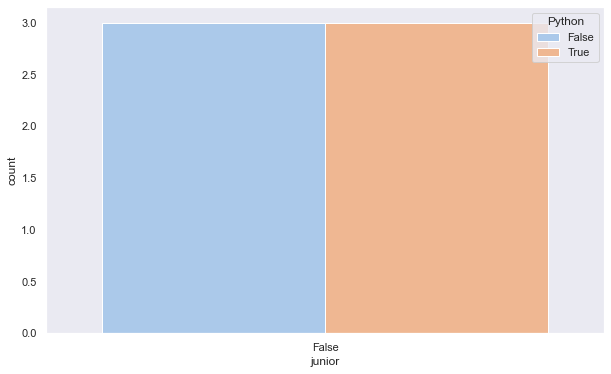

In [33]:
#Junior vs Python
sns.countplot(x="junior", hue="Python", data=df)

<AxesSubplot:xlabel='Experience', ylabel='count'>

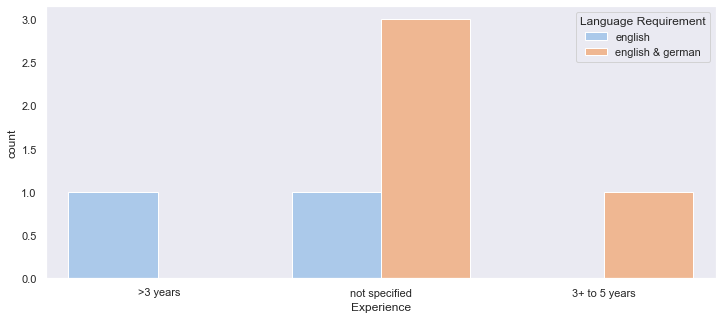

In [35]:
#Experience vs Language Requirement
plt.figure(figsize=(12,5))
sns.countplot(x="Experience", hue="Language Requirement", data=df)

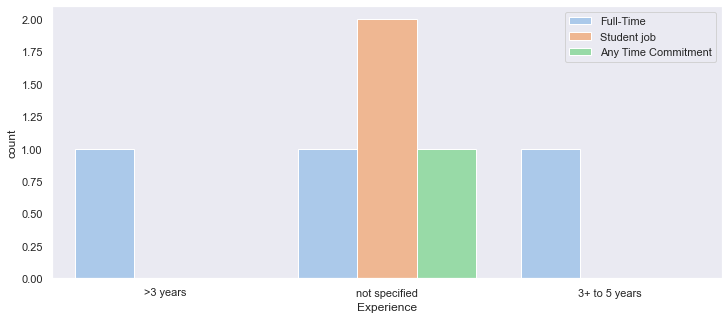

In [44]:
#Experience vs Employment
plt.figure(figsize=(12,5))
sns.countplot(x="Experience", hue="employment_type", data=df)
plt.legend(bbox_to_anchor=(1,1), loc="upper right")

<AxesSubplot:xlabel='Experience', ylabel='count'>

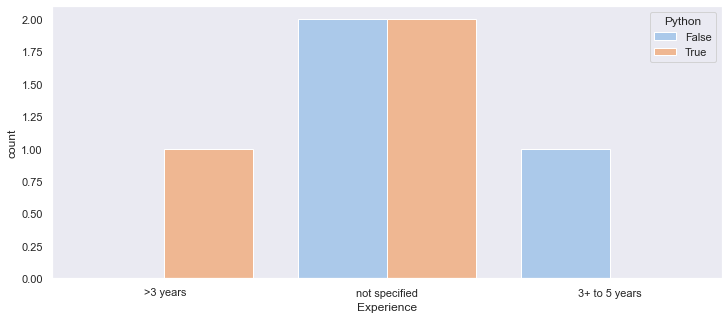

In [37]:
#Experience vs Python
plt.figure(figsize=(12,5))
sns.countplot(x="Experience", hue="Python", data=df)

<AxesSubplot:xlabel='Experience', ylabel='count'>

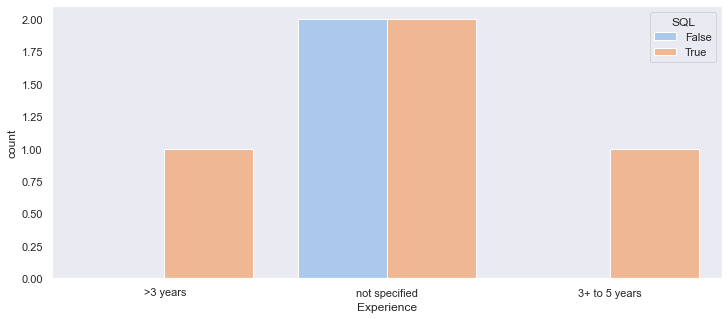

In [38]:
#Experience vs SQL
plt.figure(figsize=(12,5))
sns.countplot(x="Experience", hue="SQL", data=df)

## Upload data to a datasheet so we can read it using datastudio
### Data studio link: https://datastudio.google.com/reporting/a1a2c2a1-eb60-4c8d-9830-17493b1a0eae/page/qYnFC/edit

In [40]:
scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']
SECRETS_FILE = "job_adds_last.json"
json_key = json.load(open(SECRETS_FILE)) #reads json file
# Give the path to the Service Account Credential json file 
credentials = ServiceAccountCredentials.from_json_keyfile_name(SECRETS_FILE, scope)
# Authorise your Notebook
gc = gspread.authorize(credentials)

# The sprad sheet ID, which can be taken from the link to the sheet
spreadsheet_key = '1d7fj6n9oodi4woecyAVdtbQPfwkvM61ajAXqtLTz_Ew'

In [41]:
# Set the sheet name you want to upload data to and the start cell where the upload data begins 
wks_name = 'job adds'
cell_of_start_df = 'A1'
# upload the dataframe of the clients we want to delete
d2g.upload(df, spreadsheet_key, wks_name, credentials=credentials, row_names=True)
print ('The sheet is updated successfully')

The sheet is updated successfully
